In [80]:
import sys
sys.path.append('../../../')
import helper

import numpy as np
import matplotlib.pyplot as plt

In [81]:
results = helper.get_filenames_results()
for key in results:
    print(str(key) + ': ' + str(helper.get_params_results(key)))

1: {'dataset_name': '3', 'method': 'gauss-newton', 'init_dist_x': 50, 'init_dist_y': 0, 'init_density_x': 1001, 'init_density_y': 1}


In [82]:
def get_and_parse_result(name):
    params_result = helper.get_params_results(name)
    params_dataset = helper.get_params_dataset(params_result['dataset_name'])
    dataset_filename = helper.get_filenames_datasets()[params_result['dataset_name']]
    f = helper.get_func_research(params_dataset['f_label'])
    X, Y, datasets = helper.load_datasets(dataset_filename)
    
    dataset_X = []
    dataset_Y = []
    for i in range(params_dataset['test_count']):
        dataset_X.append(datasets[i][:, 0])
        dataset_Y.append(datasets[i][:, 1])

    result = []
    # result = {"Steps": [], "Step 90%": [], "MSE": [], "MSE 90%": []}
    result_no_parse = helper.load_json(helper.get_filenames_results()[name])
    
    # one_point = result_no_parse[0]
    for one_point in result_no_parse:
        one_point_array = []
        one_point_mse = []
        one_point_steps = [] 

        one_point_array.append(one_point["init_weights"][0])
        one_point_array.append(one_point["init_weights"][1])

        for i in range(params_dataset['test_count']):
            one_point_mse.append(helper.mse_loss(dataset_X[i], dataset_Y[i], np.array((one_point["results"][i][0][1], one_point["results"][i][0][1]), dtype=float), f))
            one_point_steps.append(one_point["results"][i][1])

        def get_quantile(array):
            sorted_array = sorted(array)

            quantile_index = int(0.9 * params_dataset['test_count'])
            return sorted_array[:quantile_index]

        average_mse = sum(one_point_mse) / len(one_point_mse)
        average_steps = sum(one_point_steps) / len(one_point_steps)

        quantile_one_point_mse = get_quantile(one_point_mse)
        quantile_sorted_one_point_steps = get_quantile(one_point_steps)

        average_quantile_mse = sum(quantile_one_point_mse) / len(quantile_one_point_mse)
        average_quantile_steps = sum(quantile_sorted_one_point_steps) / len(quantile_sorted_one_point_steps)

        one_point_array.append(average_mse)
        one_point_array.append(average_steps)
        one_point_array.append(average_quantile_mse)
        one_point_array.append(average_quantile_steps)

        result.append(one_point_array)

    return np.array(result)
    # print(f'one_point {one_point}')
    # print(f'one_point_mse {one_point_mse}')
    # print(f'one_point_steps {one_point_steps}')
    # print(f'average_mse {average_mse}')
    # print(f'average_steps {average_steps}')
    # print(f'average_quantile_mse {average_quantile_mse}')
    # print(f'average_quantile_steps {average_quantile_steps}')

metric_to_columns = {'MSE': 2, "Steps": 3, 'MSE 90%': 4, 'Steps 90%': 5}

In [83]:
def print_results_one_line(results_list, labels_list, metric_name, axis=0):
    for i in range(len(results_list)):
        plt.plot(results_list[i][:, axis], results_list[i][:, metric_to_columns[metric_name]], label=labels_list[i])
    plt.xlabel(f'init point axis={axis}')
    plt.ylabel(metric_name)
    plt.title(f'Research starting point axis={axis}')
    plt.grid(True)
    plt.legend()
    plt.show()

In [84]:
def parse_and_print(list_names):
    results_list = []
    labels_list = []

    for name in list_names:
        results_list.append(get_and_parse_result(name))
        labels_list.append(helper.get_params_results(name)['method'] + ' ' + name)
    
    for metric_name in metric_to_columns: 
        print_results_one_line(results_list, labels_list, metric_name)

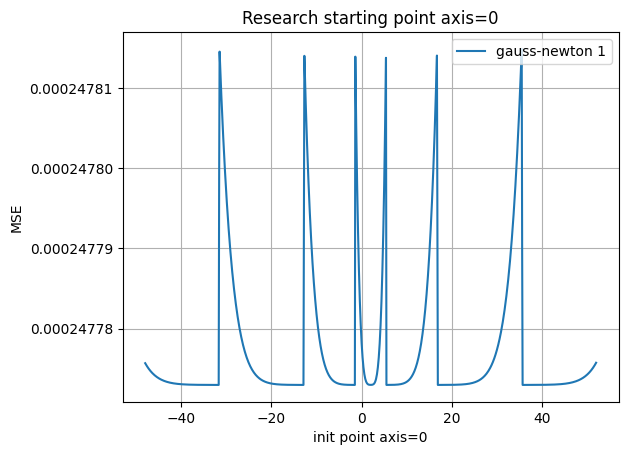

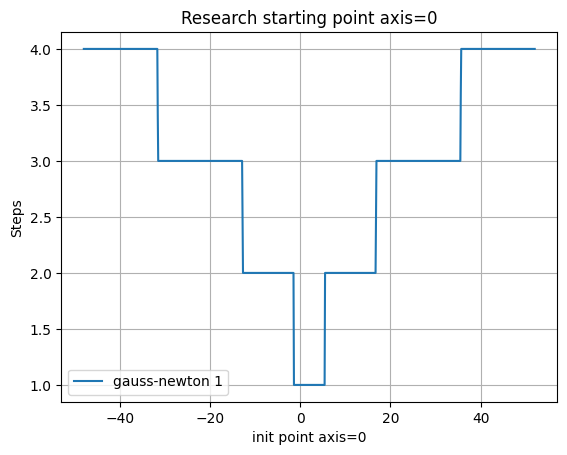

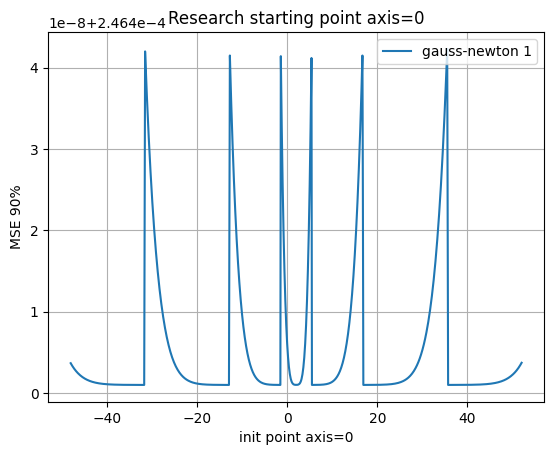

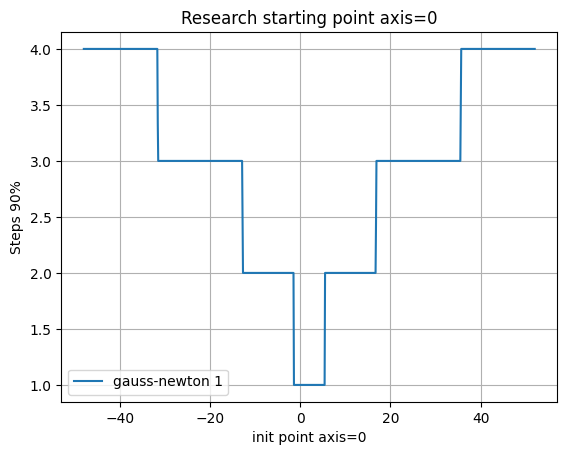

In [85]:
parse_and_print(['1'])